In [1]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [2]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [3]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [4]:
df['year'] = df.Day.dt.year
df['month'] = df.Day.dt.month

In [6]:
avg_temps = df.groupby('year').mean()
print('Coldest:', avg_temps[avg_temps.t == avg_temps.t.min()].index[0])
print('Warmest:', avg_temps[avg_temps.t == avg_temps.t.max()].index[0])

Coldest: 2012
Warmest: 2015


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [13]:
df[(df.month == 1) & (df.t >= 0)].year.value_counts().index[0]

2008

**3.** В каком году было самое холодное лето (по средней температуре)

In [14]:
summer_means = df[(df.month >= 6) & (df.month <= 8)].groupby('year').mean()
print('The coldest summer was in', summer_means[summer_means.t == summer_means.t.min()].index[0])
summer_means

The coldest summer was in 2008


,t,month
year,,
2008,18.119565,7.010870
2009,18.728261,7.010870
2010,22.119565,7.010870
2011,21.318681,7.010989
2012,19.086957,7.010870
2013,21.543478,7.010870
2014,20.706522,7.010870
2015,19.032609,7.010870
2016,19.326087,7.010870


**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [15]:
df['t_diff'] = df.t.diff()
df[df.t_diff == df.t_diff.max()]

,Day,t,year,month,t_diff
1819,2012-12-27,3,2012,12,14.0


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

<AxesSubplot:xlabel='year'>

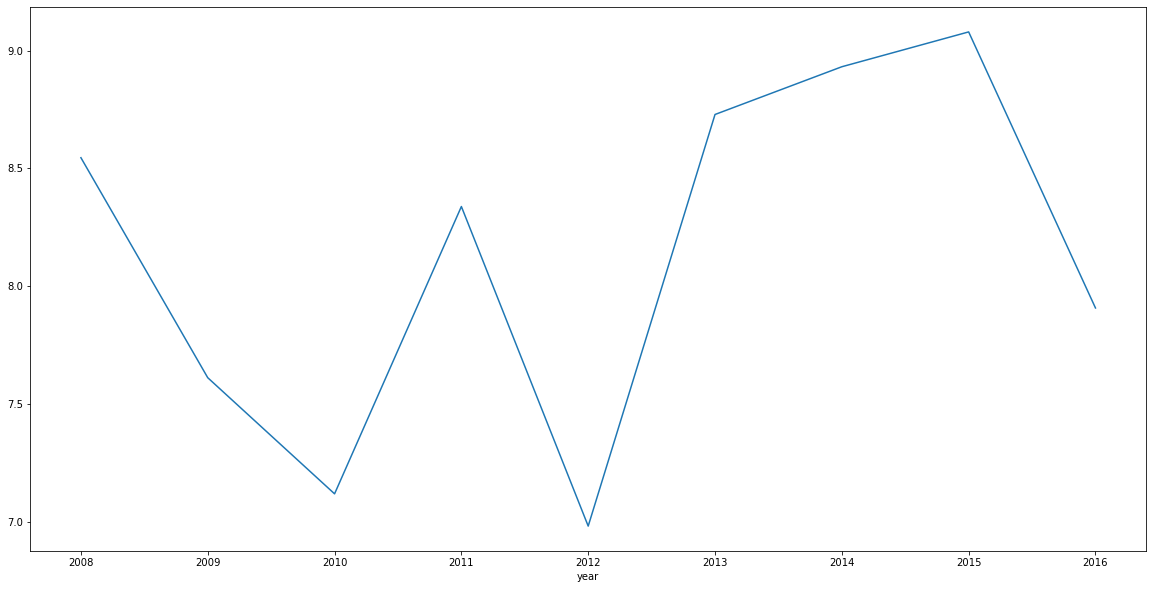

In [16]:
avg_temps = df.groupby('year').mean()

fig, ax = plt.subplots(figsize=(20,10))
avg_temps.t.plot(ax=ax)